# Titanic EDA Lab

### Having insights into your data can be the difference between sinking or swimming on a project. Here we'll dive into some Exploratory Data Analysis techniques on the iconic Titanic data set.


## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
3. Download the `train.csv` file into this project
4. Load the csv into pandas.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Step 2: Cleaning the data
Note: `NaN`, empty, and missing are synonymous.

2a) Create a bar chart showing how many missing values are in each column

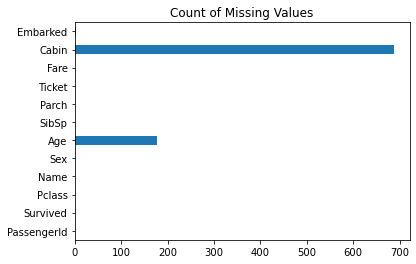

In [4]:
df.isnull().sum().plot(kind='barh')
plt.title('Count of Missing Values');

2b) Which column has the most `NaN` values? How many cells in that column are empty?

In [5]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

2c) Delete all rows where `Embarked` is empty

In [6]:
df.dropna(subset=['Embarked'], inplace=True)

2d) Fill all empty cabins with **¯\\_(ツ)_/¯**

In [7]:
df['Cabin'].fillna('¯\(ツ)/¯', inplace=True)

In [8]:
# Checking current number of nulls
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

## Step 3: Feature extraction
3a)  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [9]:
df['FamilyCount'] = df['Parch'] + df['SibSp']

3b) Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [10]:
df['IsReverend'] = df['Name'].str.contains('Rev.').map(lambda x: int(x))

3c) In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  1. Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  

In [11]:
df = pd.get_dummies(df, columns=['Embarked'])

  2. Do the same thing for `Sex`
  

In [12]:
df['IsMale'] = df['Sex'].map(lambda x: 1 if x == 'male' else 0)

In [13]:
# Dropping Sex column since we've dummified the data
df.drop('Sex', axis=1, inplace=True)

  3. BONUS: Extract the title from everyone's name and create dummy columns

In [14]:
df['Title'] = [each.split(',')[1].split('.')[0].strip() for each in df['Name']]

In [15]:
#Checking how the dataframe currently looks
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsMale,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,1,Mr


## Step 4: Exploratory analysis
4a) What was the survival rate overall?

In [16]:
df['Survived'].mean()

0.38245219347581555

4b) Which gender fared the worst? What was their survival rate?

In [17]:
df.groupby('IsMale').mean()[['Survived']]

,Survived
IsMale,
0,0.740385
1,0.188908


4c) What was the survival rate for each `Pclass`?

In [18]:
df.groupby('Pclass').mean()[['Survived']]

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


4d) Did any reverends survive? How many?

In [19]:
df[df['IsReverend'] == 1][['Survived']]

,Survived
149,0
150,0
249,0
626,0
848,0
886,0


4e) What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [20]:
df[df['Cabin'] == '¯\(ツ)/¯'][['Survived']].mean()

Survived    0.299854
dtype: float64

4f) What is the survival rate for people whose `Age` is empty?

In [21]:
df[df['Age'].isnull()][['Survived']].mean()

Survived    0.293785
dtype: float64

4g) What is the survival rate for each port of embarkation?

In [22]:
# Using a for loop rather then calculating each one individually
for col in ['Embarked_C', 'Embarked_Q', 'Embarked_S']:
    print(f'{col} :')
    print(df[df[col] == 1][['Survived']].mean())
    print()

Embarked_C :
Survived    0.553571
dtype: float64

Embarked_Q :
Survived    0.38961
dtype: float64

Embarked_S :
Survived    0.336957
dtype: float64



4h) What is the survival rate for children (under 12) in each `Pclass`?

In [23]:
df[df['Age'] < 12].groupby('Pclass').mean()[['Survived']]

,Survived
Pclass,
1,0.750000
2,1.000000
3,0.404255


4i) Did the captain of the ship survive? Is he on the list?

In [24]:
df[df['Name'].str.contains('Capt.')]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsMale,Title
745,746,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0,B22,2,0,0,0,1,1,Capt


4j) Of all the people that died, who had the most expensive ticket? How much did it cost?

In [25]:
df[df['Survived'] == 0].sort_values(by='Fare', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsMale,Title
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0000,C23 C25 C27,5,0,0,0,1,1,Mr
438,439,0,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0000,C23 C25 C27,5,0,0,0,1,1,Mr
118,119,0,1,"Baxter, Mr. Quigg Edmond",24.0,0,1,PC 17558,247.5208,B58 B60,1,0,1,0,0,1,Mr
557,558,0,1,"Robbins, Mr. Victor",NaN,0,0,PC 17757,227.5250,¯\(ツ)/¯,0,0,1,0,0,1,Mr
527,528,0,1,"Farthing, Mr. John",NaN,0,0,PC 17483,221.7792,C95,0,0,0,0,1,1,Mr


4k) Does having family on the boat help or hurt your chances of survival?

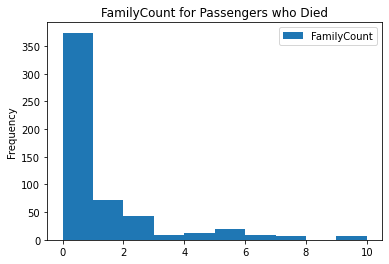

In [26]:
df[df['Survived'] == 0][['FamilyCount']].plot(kind='hist')
plt.title('FamilyCount for Passengers who Died');

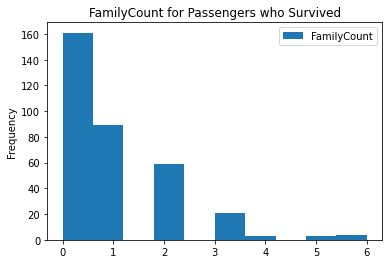

In [27]:
df[df['Survived'] == 1][['FamilyCount']].plot(kind='hist')
plt.title('FamilyCount for Passengers who Survived');

In [28]:
# Creating variable of survived and died
died = df[df['Survived'] == 0][['FamilyCount']]
survived = df[df['Survived'] == 1][['FamilyCount']]

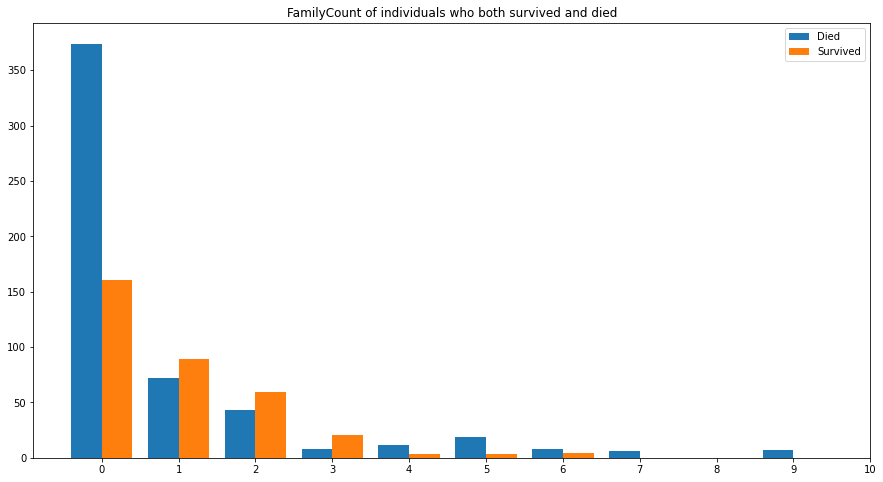

In [29]:
# It can sometimes be difficult to compare histograms of different data in different plots. Plotting everything in one graph can make for clearer insights.  
plt.figure(figsize=(15,8))
plt.hist([died['FamilyCount'], survived['FamilyCount']], label=['Died', 'Survived'], align='left')
plt.title('FamilyCount of individuals who both survived and died')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.legend();

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

*Note: Answers may vary*


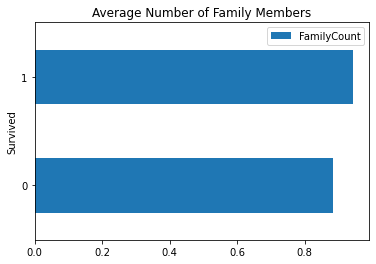

In [30]:
df.groupby('Survived').mean()[['FamilyCount']].plot(kind='barh')
plt.title('Average Number of Family Members');

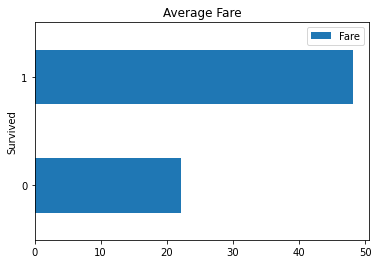

In [31]:
df.groupby('Survived').mean()[['Fare']].plot(kind='barh')
plt.title('Average Fare');

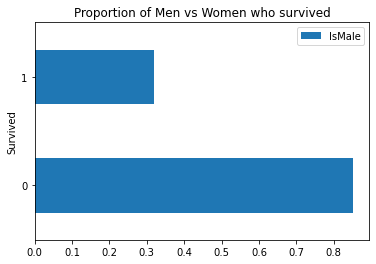

In [32]:
df.groupby('Survived').mean()[['IsMale']].plot(kind='barh')
plt.title('Proportion of Men vs Women who survived');

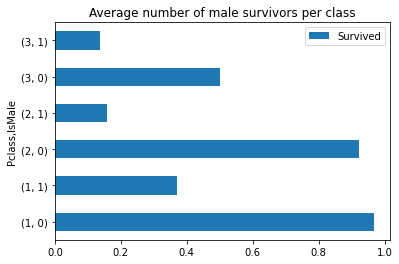

In [33]:
df.groupby(['Pclass', 'IsMale']).mean()[['Survived']].plot(kind='barh')
plt.title('Average number of male survivors per class');